In [98]:
import numpy as np


In [99]:
#2.1 Creating the initial board
N = 100
Lattice = np.random.randint(0,2,[N,N])          # Using randint approach
Lattice[Lattice == 0] = -1                          # Converting '0' into '-1'

print(Lattice)

[[ 1 -1 -1 ... -1 -1  1]
 [ 1 -1 -1 ...  1 -1 -1]
 [ 1 -1  1 ...  1 -1 -1]
 ...
 [ 1  1 -1 ...  1 -1  1]
 [ 1 -1  1 ...  1 -1 -1]
 [ 1 -1 -1 ...  1  1 -1]]


In [100]:
def local_E(board,i,j,J,size):
    fset = [(-1,0),(1,0),(0,-1),(0,1)]
    list1 = []
    
    for (dx,dy) in fset:
        # Y = I
        k = i + dy
        # X = J
        l = j + dx
        #print(k,l)
        if (k,l) != (i,j) and 0 <= k <= size-1 and  0 <= l <= size-1:
            list1.append( board[k][l] * board[i][j] )

    return sum(list1) * J * -1

In [101]:
from numpy import exp
steps = 100
T = 1
beta = 1/T
J = 1


#random flip
for i in range(steps):

    LEi_list = []
    for x in range(len(Lattice)):
        for y in range(len(Lattice)):
            LEi_list.append( local_E(Lattice,y,x,J,N) )
            delta_Ei = sum(LEi_list)

    X = np.random.randint(0,100)
    Y = np.random.randint(0,100)
    Lattice[Y,X] = Lattice[Y][X] * -1


    #Delta E
    LEf_list = []
    for x in range(len(Lattice)):
        for y in range(len(Lattice)):
            LEf_list.append( local_E(Lattice,y,x,J,N) )
            delta_Ef = sum(LEf_list)


    #Metropolis
    if delta_Ef < delta_Ei: rwen = 'rwen' #Essentially "if Ef > Ei : Do nothing"
    else:
        r = np.random.randint(0,1)
        if r <= np.exp((delta_Ei-delta_Ef) / beta ): rwen = 'rwen'
        else:
            Lattice[Y,X] = Lattice[Y,X] * -1


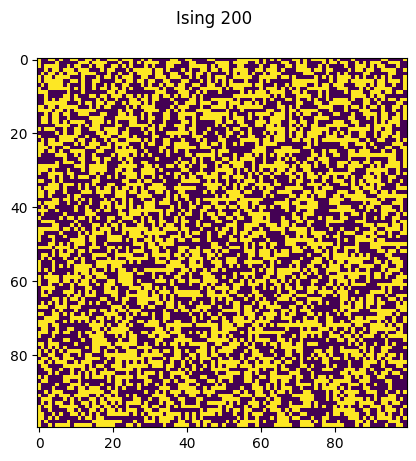

In [102]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots()
fig.suptitle('Ising 200')
axs.imshow(Lattice, interpolation='nearest')
